<center><span style="font-size:40px; font-weight:bold; background-color:pink;">Detection of fire using surveillance camera footage</span></center>


## Problem Statement:
Develop an intelligent system capable of accurately detecting instances of fire in surveillance camera footage. The primary goal of this project is to create a robust and reliable fire detection model using Convolutional Neural Networks (CNNs) that can assist in early fire detection, thereby preventing potential disasters and providing swift responses.

### Reason for Choosing the Project:

This project was chosen to address the critical need for advanced fire detection solutions using modern technologies like Convolutional Neural Networks (CNNs). Traditional fire detection methods often rely on human observation and can lead to delayed responses, potentially resulting in severe damages and loss of life. By harnessing the power of CNNs, this project aims to create an intelligent system capable of detecting fires in surveillance camera footage accurately and rapidly. By choosing this project, we strive to contribute to public safety by preventing disasters through early fire detection and enabling timely emergency responses.

<center><img src="fire_progression.png"></center>

## Introduction:
The "Detection of Fire Using Surveillance Camera Footage" project aims to develop an automated solution for timely fire detection in various environments. By harnessing the power of Convolutional Neural Networks (CNNs), this project seeks to create a robust system capable of analyzing surveillance camera footage and accurately identifying instances of fire. This technology holds the potential to revolutionize fire detection, providing a proactive approach that enhances public safety, minimizes property damage, and saves lives.## Introduction:
The "Detection of Fire Using Surveillance Camera Footage" project aims to develop an automated solution for timely fire detection in various environments. By harnessing the power of Convolutional Neural Networks (CNNs), this project seeks to create a robust system capable of analyzing surveillance camera footage and accurately identifying instances of fire. This technology holds the potential to revolutionize fire detection, providing a proactive approach that enhances public safety, minimizes property damage, and saves lives.

- **Content**
This dataset contains 10,003 images that have been classified into 3 different sets (Training, Validation, and Test). The ratio in which they have been spilt is 3 : 1 : 1. Out of the 5003 images that contain fire, 2,567 images have been synthetically generated by superimposing images of fire on videos of roads in Singapore

## Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load and Explore Data:

In [3]:
train_dir = r'C:\DATA ANALYTICS\DL\FIREDATA_PROJECT\Fire_Detection_Using_Surveillance_Camera_on_Roads\Train'
validation_dir = r'C:\DATA ANALYTICS\DL\FIREDATA_PROJECT\Fire_Detection_Using_Surveillance_Camera_on_Roads\Vali'
test_dir =r'C:\DATA ANALYTICS\DL\FIREDATA_PROJECT\Fire_Detection_Using_Surveillance_Camera_on_Roads\Test'

# r prefix is used to indicate that the string should be treated as a raw string, allowing the backslashes in the file paths 
#to be interpreted directly as part of the path and not as escape characters.

## Class Distribution:

In [4]:
# Data preprocessing and augmentation
batch_size = 32  #number of images that will be processed in each batch during training.
image_size = (224, 224)  # Adjust based on your model architecture

# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary')

Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Found 6003 images belonging to 2 classes.


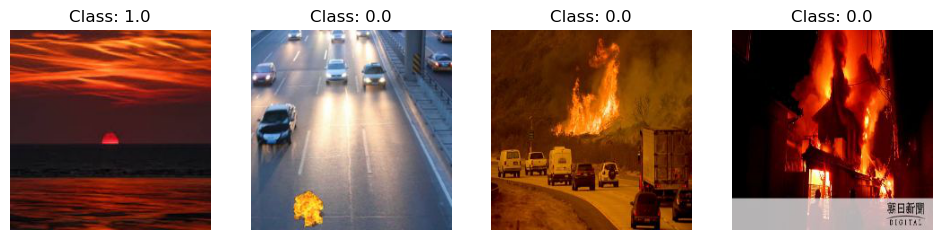

In [9]:
# Load and visualize a few augmented samples from the dataset
sample_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=5,
    class_mode='binary',
    shuffle=True
)

plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_generator[0][0][i])
    plt.title(f'Class: {sample_generator[0][1][i]}')
    plt.axis('off')
plt.show()


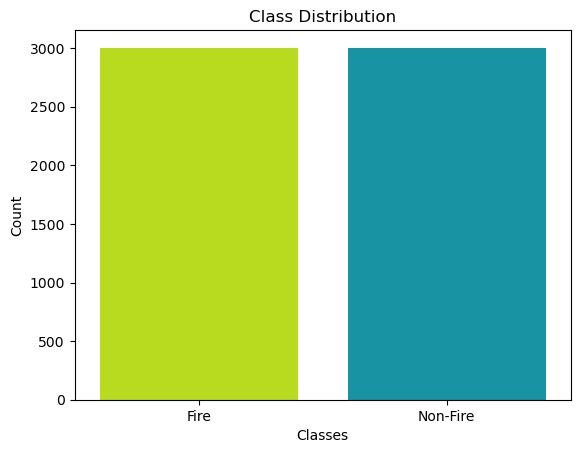

In [11]:
# Visualize class distribution

class_counts = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

sns.countplot(x=class_counts, palette='nipy_spectral_r')
plt.xticks(range(2), class_labels)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

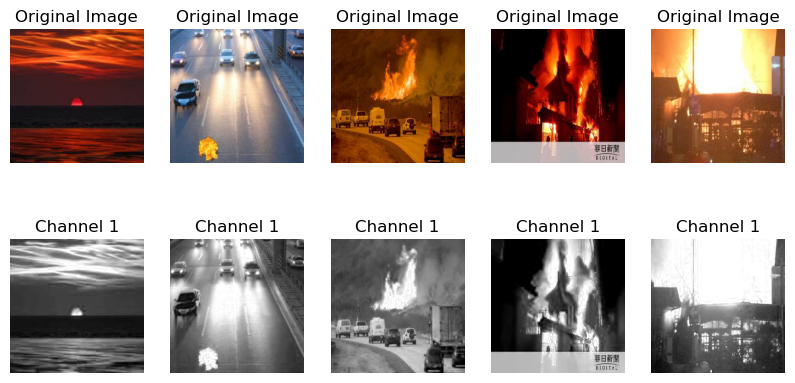

In [12]:
# Visualize image characteristics (e.g., color channels)
sample_images = sample_generator[0][0]  # Get a batch of sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Original Image')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(sample_images[i][:, :, 0], cmap='gray')
    plt.title('Channel 1')
    plt.axis('off')
plt.show()

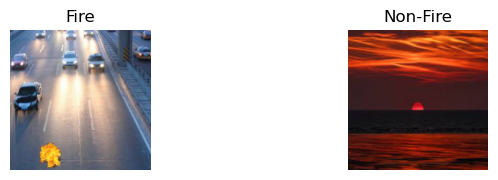

In [21]:

fire_samples = [sample_generator[0][0][i] for i, label in enumerate(sample_generator[0][1]) if label == 0]
non_fire_samples = [sample_generator[0][0][i] for i, label in enumerate(sample_generator[0][1]) if label == 1]

n = min(len(fire_samples), len(non_fire_samples))

plt.figure(figsize=(8, 4))
for i in range(n):
    for j, label in enumerate(['Fire', 'Non-Fire']):
        plt.subplot(2, 2, i + 2+j + 1)
        plt.imshow(fire_samples[i]) if label == 'Fire' else plt.imshow(non_fire_samples[i])
        plt.title(label)
        plt.axis('off')
plt.show()

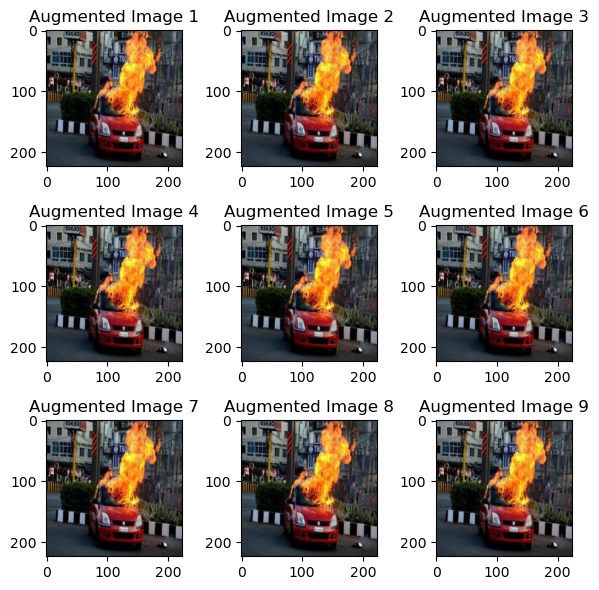

In [24]:
import cv2

# Choose a sample image to augment and visualize
sample_class = 'fire'  # Replace with the desired class (fire or non-fire)
sample_image_path = os.path.join(train_dir, sample_class, os.listdir(os.path.join(train_dir, sample_class))[0])

# Load and preprocess the sample image
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, (224, 224))  # Adjust size to match your model input size

# Create a grid of augmented images
augmented_images_grid = []
for i in range(9):  # Create 9 augmented images for visualization
    augmented_image = train_datagen.random_transform(sample_image)
    augmented_images_grid.append(augmented_image)

# Plot the original and augmented images
plt.figure(figsize=(6, 6))
plt.subplot(3,3,1)
plt.imshow(sample_image)
plt.title('Original Image')
for i, augmented_image in enumerate(augmented_images_grid, start=2):
    plt.subplot(3,3, i-1)
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i-1}')

plt.tight_layout()
plt.show()


## Building CNN model

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import models, layers, regularizers

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='tanh'))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(512, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))

model.add(layers.Dense(1, activation='sigmoid'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [16]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,   ## batch size is 20, 2000 images in train, 2000/20 =100 will be steps per epoch
      epochs=20,             ## Iterative
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13412\2595808150.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 249s 2s/step - loss: 6.0960 - acc: 0.6269 - val_loss: 5.0618 - val_acc: 0.4412
Epoch 2/20
100/100 [==============================] - 199s 2s/step - loss: 3.9583 - acc: 0.6906 - val_loss: 3.3480 - val_acc: 0.4769
Epoch 3/20
100/100 [==============================] - 185s 2s/step - loss: 2.4655 - acc: 0.7497 - val_loss: 1.9790 - val_acc: 0.7300
Epoch 4/20
100/100 [==============================] - 183s 2s/step - loss: 1.5191 - acc: 0.7709 - val_loss: 1.2049 - val_acc: 0.7625
Epoch 5/20
100/100 [==============================] - 175s 2s/step - loss: 0.9535 - acc: 0.7854 - val_loss: 0.6787 - val_acc: 0.8662
Epoch 6/20
100/100 [==============================] - 170s 2s/step - loss: 0.6653 - acc: 0.7997 - val_loss: 0.5820 - val_acc: 0.7725
Epoch 7/20
100/100 [==============================] - 168s 2s/step - loss: 0.5008 - acc: 0.8196 - val_loss: 0.4217 - val_acc: 0.8413
Epoch 8/20
100/100 [==============================] - 169s 2s/step - 

## Plot

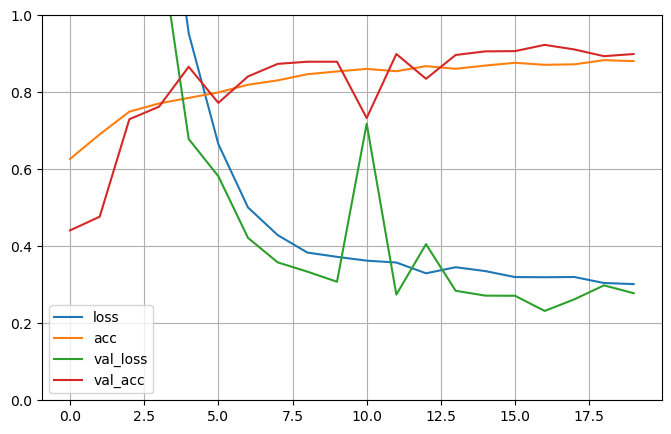

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluation on Test data

In [19]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test accuracy: {test_acc}')

Found 2000 images belonging to 2 classes.
63/63 [==============================] - 46s 730ms/step - loss: 0.2890 - acc: 0.9065
Test accuracy: 0.906499981880188


### Confusion Matrix

In [20]:
# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))

# Convert predicted probabilities to class labels (0 or 1)
predicted_labels = np.round(predictions).astype(int)

# Get true labels from the test generator
true_labels = test_generator.classes

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
from sklearn.metrics import classification_report
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)

print("Classification Report:")
print(class_report)


63/63 [==============================] - 19s 299ms/step
Confusion Matrix:
[[599 401]
 [560 440]]
Classification Report:
              precision    recall  f1-score   support

        Fire       0.52      0.60      0.55      1000
    Non-Fire       0.52      0.44      0.48      1000

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



The balanced accuracy and F1-scores for both classes are around 0.52, indicating a relatively low overall performance. The precision and recall scores are also moderate. This suggests that the model might struggle with distinguishing between "Fire" and "Non-Fire" instances in the given dataset. Further analysis, **hyperparameter tuning**, and possibly additional data may be needed to improve the model's performance.

### 1. Fine-Tuning the Model Architecture:

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [14]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=num_epochs,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=50
)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)
print("********************************************************************")
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test accuracy: {test_acc}')

Epoch 1/20
100/100 [==============================] - 433s 4s/step - loss: 0.2223 - accuracy: 0.9172 - val_loss: 0.2204 - val_accuracy: 0.9144
Epoch 2/20
100/100 [==============================] - 415s 4s/step - loss: 0.1978 - accuracy: 0.9272 - val_loss: 0.2199 - val_accuracy: 0.9112
Epoch 3/20
100/100 [==============================] - 415s 4s/step - loss: 0.2149 - accuracy: 0.9162 - val_loss: 0.2055 - val_accuracy: 0.9212
Epoch 4/20
100/100 [==============================] - 412s 4s/step - loss: 0.1924 - accuracy: 0.9244 - val_loss: 0.1953 - val_accuracy: 0.9262
Epoch 5/20
100/100 [==============================] - 413s 4s/step - loss: 0.1859 - accuracy: 0.9275 - val_loss: 0.2352 - val_accuracy: 0.9200
Epoch 6/20
100/100 [==============================] - 423s 4s/step - loss: 0.1845 - accuracy: 0.9291 - val_loss: 0.2051 - val_accuracy: 0.9237
Epoch 7/20
100/100 [==============================] - 418s 4s/step - loss: 0.1890 - accuracy: 0.9278 - val_loss: 0.2622 - val_accuracy: 0.9075

In [15]:
# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_labels = np.round(predictions).astype(int)
true_labels = test_generator.classes

print("********************************************************************")
# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)

63/63 [==============================] - 37s 583ms/step
********************************************************************
Confusion Matrix:
[[903  97]
 [ 56 944]]
Classification Report:
              precision    recall  f1-score   support

        Fire       0.94      0.90      0.92      1000
    Non-Fire       0.91      0.94      0.93      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000






#### Key Improvements:
- The modified model architecture, along with the use of the Adam optimizer and the appropriate learning rate, has led to a much better-performing model. 
- The confusion matrix and classification report show that the model is now able to correctly classify "Fire" and "Non-Fire" instances with high accuracy and minimal confusion. 
- This model is likely to be more reliable for real-world deployment in classifying fire and non-fire instances in the given dataset

## Data Augmentation:

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [17]:
num_epochs = 20
# Train the model using augmented data
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=50
)
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)
print("********************************************************************")
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test accuracy: {test_acc}')

Epoch 1/20
100/100 [==============================] - 613s 6s/step - loss: 0.1831 - accuracy: 0.9281 - val_loss: 0.1977 - val_accuracy: 0.9244
Epoch 2/20
100/100 [==============================] - 448s 4s/step - loss: 0.1583 - accuracy: 0.9409 - val_loss: 0.1577 - val_accuracy: 0.9369
Epoch 3/20
100/100 [==============================] - 428s 4s/step - loss: 0.1517 - accuracy: 0.9444 - val_loss: 0.2909 - val_accuracy: 0.8950
Epoch 4/20
100/100 [==============================] - 446s 4s/step - loss: 0.1575 - accuracy: 0.9429 - val_loss: 0.1758 - val_accuracy: 0.9325
Epoch 5/20
100/100 [==============================] - 426s 4s/step - loss: 0.1559 - accuracy: 0.9420 - val_loss: 0.1960 - val_accuracy: 0.9225
Epoch 6/20
100/100 [==============================] - 428s 4s/step - loss: 0.1393 - accuracy: 0.9488 - val_loss: 0.1539 - val_accuracy: 0.9388
Epoch 7/20
100/100 [==============================] - 427s 4s/step - loss: 0.1411 - accuracy: 0.9503 - val_loss: 0.1957 - val_accuracy: 0.9294

In [18]:
# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_labels = np.round(predictions).astype(int)
true_labels = test_generator.classes

print("********************************************************************")
# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)

63/63 [==============================] - 76s 1s/step
********************************************************************
Confusion Matrix:
[[965  35]
 [117 883]]
Classification Report:
              precision    recall  f1-score   support

        Fire       0.89      0.96      0.93      1000
    Non-Fire       0.96      0.88      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000



- The model's accuracy on the test set is approximately 92.40%, which indicates that it performs well on previously unseen data.
- Both classes ("Fire" and "Non-Fire") have good precision, recall, and F1-score values, suggesting that the model's performance is balanced.

- Based on this information, the conclusion is that the model has been successfully fine-tuned and trained with data augmentation, resulting in a reliable binary classification model for detecting fire and non-fire instances in the given dataset. 
- The model demonstrates good generalization capability and is likely to perform well in real-world scenarios.

# Exploring Advanced Architectures:

Experiment with pre-trained models like VGG16, ResNet, or MobileNet:

### VGG16

In [19]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [20]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27,560,769
Trainable params: 12,846,081
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
num_epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=50
)

# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)
print("********************************************************************")
test_loss, test_acc = model.evaluate(test_generator, steps=50)

print(f'Test accuracy: {test_acc}')

Epoch 1/20
100/100 [==============================] - 1119s 11s/step - loss: 0.7599 - accuracy: 0.7434 - val_loss: 0.3100 - val_accuracy: 0.8675
Epoch 2/20
100/100 [==============================] - 1109s 11s/step - loss: 0.3358 - accuracy: 0.8557 - val_loss: 0.2677 - val_accuracy: 0.8881
Epoch 3/20
100/100 [==============================] - 1114s 11s/step - loss: 0.2847 - accuracy: 0.8745 - val_loss: 0.1950 - val_accuracy: 0.9181
Epoch 4/20
100/100 [==============================] - 1115s 11s/step - loss: 0.2654 - accuracy: 0.8828 - val_loss: 0.2189 - val_accuracy: 0.9031
Epoch 5/20
100/100 [==============================] - 1117s 11s/step - loss: 0.2487 - accuracy: 0.8944 - val_loss: 0.2398 - val_accuracy: 0.8931
Epoch 6/20
100/100 [==============================] - 1118s 11s/step - loss: 0.2525 - accuracy: 0.8906 - val_loss: 0.2536 - val_accuracy: 0.8844
Epoch 7/20
100/100 [==============================] - 1120s 11s/step - loss: 0.2464 - accuracy: 0.8911 - val_loss: 0.2474 - val_ac

In [23]:
# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_labels = np.round(predictions).astype(int)
true_labels = test_generator.classes


63/63 [==============================] - 237s 4s/step


In [24]:
# Plotting the results
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 800x600 with 0 Axes>

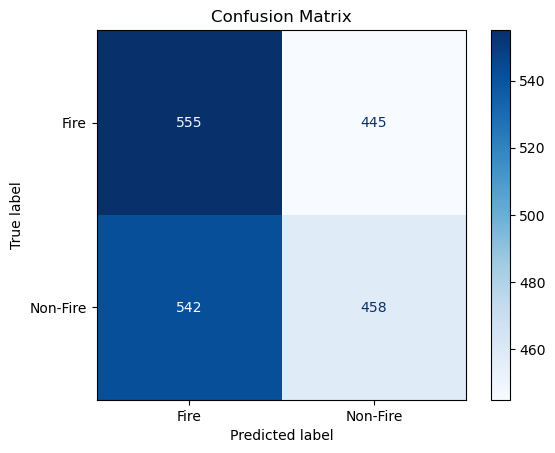

Classification Report:
              precision    recall  f1-score   support

        Fire       0.51      0.56      0.53      1000
    Non-Fire       0.51      0.46      0.48      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



In [25]:
# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=test_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

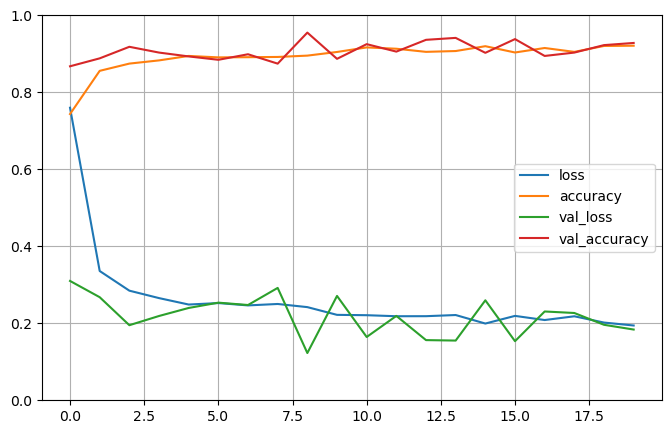

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- The test accuracy of approximately 92.87% suggests that the model is performing reasonably well on the test dataset.
- However, the precision, recall, and F1-score values for both classes ("Fire" and "Non-Fire") are quite low, around 0.51. This indicates that the model is struggling to correctly classify instances, and its performance is not satisfactory.


- In conclusion, the model trained using the VGG-16 architecture does not seem to perform well on the given task. Further analysis and experimentation are needed to improve its performance.




